In [93]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy


In [33]:
data_dir=r'E:\study\ML\projects\deeplearn\face CNN happy sade classifier\data'
img_extns=['jpeg','jpg','bmp','png']

In [34]:
os.listdir(data_dir,)

['happy', 'sad']

In [35]:
cpu=tf.config.experimental.list_physical_devices('CPU')


In [36]:
happy=os.path.join(data_dir,'happy')
os.listdir(happy)

['-clothes-enjoying-a-weekend-day-lifestyle-concept-high-quality-photo-2MJWM5R.jpg',
 '1000_F_142645226_u2th2YE2pgSUP5vQpuatIq2TO8BXZh3J.jpg',
 '1000_F_271333041_HhrRdluuVIQptyAKCConGW8nexgNxso5.jpg',
 '1000_F_296248886_PwFenL6eBELzYVMO7GPmrulC1T3Qv2yA.jpg',
 '1000_F_296248921_tIAR5b1POctrs7P1c4xTzKIBXEKHddkN.jpg',
 '1000_F_357945250_s6LmtXdV3sFc3VU1ZQG4aXkFs1A9BHNt.jpg',
 '1000_F_409899816_e3iJvvpmSE4mmpUdRfdsjqxXnObX3p9X.jpg',
 '1000_F_586253385_zFYBf0FOL0tunxnH4PUlbZRqDoH1PFwe.jpg',
 '1000_F_621924153_IU45BnoNWL80KA1EpgdYBN9ZSeEd2UPX.jpg',
 '230875105.jpg',
 '24-244483_happy-face-people-png-transparent-png.png',
 '2560px-Happy_people_in_PNG_28635746792129.jpg',
 '360_F_212192737_Cj1xDJHEuOWD93dW2qRfPJE1VrAUfyNh.jpg',
 '360_F_567876282_iUMkcDC6CgrX8AI5Mh72VQZQqFYzv7aM.jpg',
 '377359246.jpg',
 '3ecfa095e8c327a1b060634f8674c5d1.jpg',
 '402825008.jpg',
 '468ff8e8bc028c6c2c0d8907fe34c043.jpg',
 '5.jpg',
 '6.jpg',
 '71794e9bc1a641b34051f58de19b3383.jpg',
 '7a0bb75a825ad40b50d29df0ead8b00c

In [38]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        img_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(img_path)
            # print(img)
            tip=imghdr.what(img_path)
            if tip not in img_extns:
                # print(f'Not specified type of image {tip}, {image}')
                os.remove(img_path)
        except Exception as e:
            print(f'Issuie with this image {image}')
            # pass
            

In [42]:
img=cv2.imread(os.path.join(happy,'1000_F_142645226_u2th2YE2pgSUP5vQpuatIq2TO8BXZh3J.jpg'))
img.shape

(1000, 1000, 3)

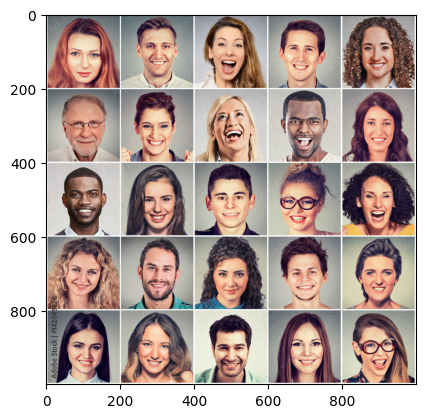

In [44]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [47]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 496 files belonging to 2 classes.


In [48]:
data_iterator=data.as_numpy_iterator()

In [55]:
batch=data_iterator.next()

In [52]:
batch[0].shape

(32, 256, 256, 3)

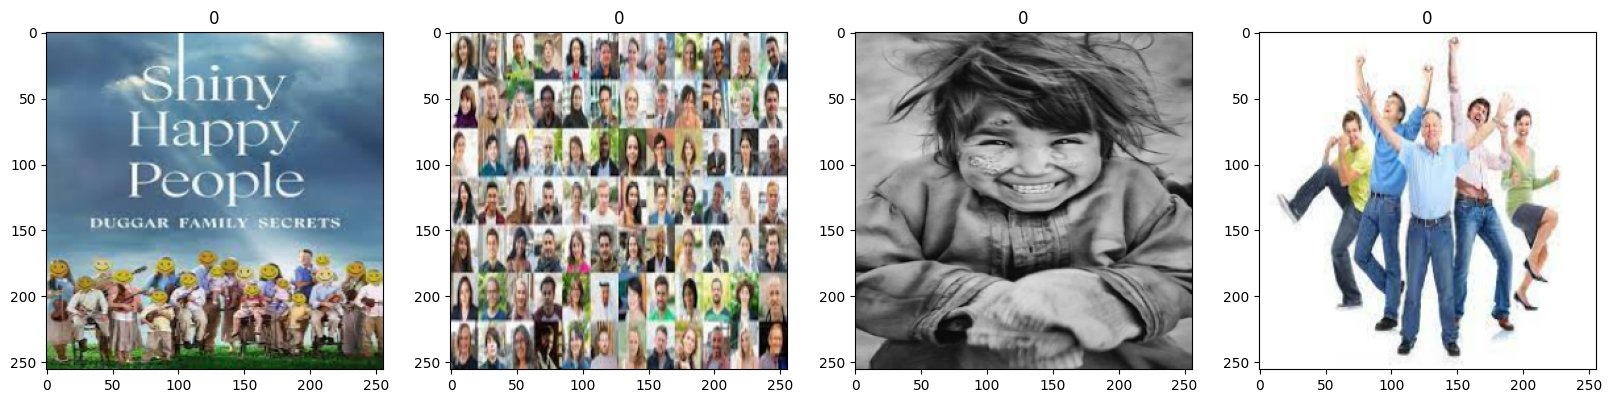

In [56]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [59]:
data=data.map(lambda x,y:(x/255.,y))

In [61]:
data.as_numpy_iterator().next()[0].max()

1.0

In [62]:
len(data)

16

##Split your data to Train, Test, Validation

In [67]:
train_size=int(len(data)-4)
val_size=int(len(data)-14)
test_size=int(len(data)-14)
train_size,val_size,test_size

(12, 2, 2)

In [66]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size).skip(val_size).take(test_size)

In [69]:
model=Sequential()

model.add(Conv2D(16,3,1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,3,1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,3,1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [72]:
logdir=r'E:\study\ML\projects\deeplearn\face CNN happy sade classifier\Face-recognition-from-google-photos_Deeplearn\logs'

In [73]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


11/11 [==============================] - 5s 281ms/step - loss: 0.7318 - accuracy: 0.6250 - val_loss: 0.5045 - val_accuracy: 0.7396
Epoch 2/20
11/11 [==============================] - 3s 257ms/step - loss: 0.5341 - accuracy: 0.7017 - val_loss: 0.4299 - val_accuracy: 0.8021
Epoch 3/20
11/11 [==============================] - 3s 250ms/step - loss: 0.4955 - accuracy: 0.7415 - val_loss: 0.4170 - val_accuracy: 0.8021
Epoch 4/20
11/11 [==============================] - 3s 254ms/step - loss: 0.4633 - accuracy: 0.7699 - val_loss: 0.4484 - val_accuracy: 0.8438
Epoch 5/20
11/11 [==============================] - 3s 254ms/step - loss: 0.3950 - accuracy: 0.8068 - val_loss: 0.3554 - val_accuracy: 0.8958
Epoch 6/20
11/11 [==============================] - 3s 260ms/step - loss: 0.3730 - accuracy: 0.8466 - val_loss: 0.3230 - val_accuracy: 0.8750
Epoch 7/20
11/11 [==============================] - 3s 272ms/step - loss: 0.3043 - accuracy: 0.8665 - val_loss: 0.3427 - val_accuracy: 0.8646
Epoc

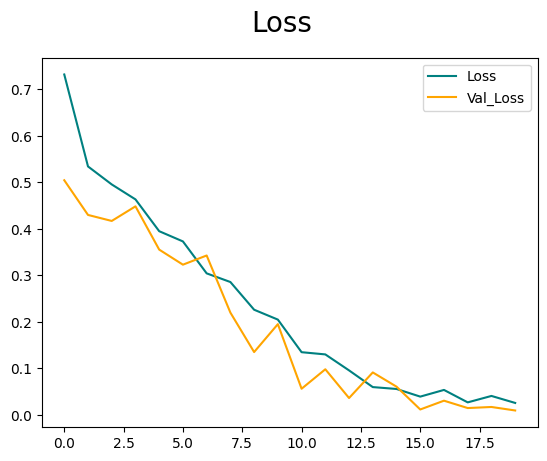

In [75]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val_Loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()


In [76]:
model.save('model.h5')

c:\Users\biovi\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tf.load_

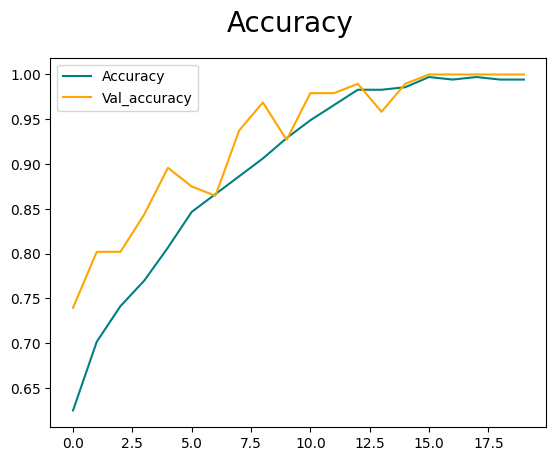

In [77]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

In [80]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()
for batch in data.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 88ms/step


In [81]:
pre.result().numpy(),re.result().numpy(),acc.result().numpy()

(1.0, 0.98507464, 0.99596775)

In [88]:
img=cv2.imread(r"E:\study\ML\projects\deeplearn\face CNN happy sade classifier\images (1).jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

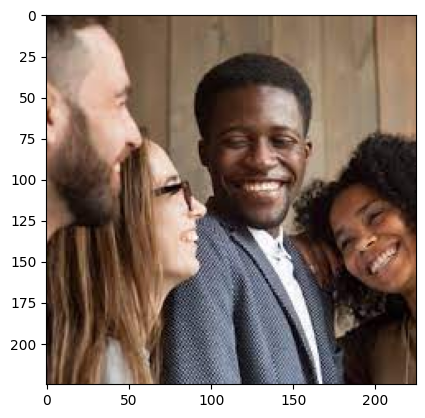

In [89]:
plt.imshow(img)

In [90]:
img=tf.image.resize(img,(256,256))

In [91]:
yhat=model.predict(np.expand_dims(img/255.,0))

1/1 [==============================] - 0s 30ms/step


In [92]:
yhat

array([[0.00145664]], dtype=float32)

In [94]:
load_model=load_model(r'E:\study\ML\projects\deeplearn\face CNN happy sade classifier\Face-recognition-from-google-photos_Deeplearn\model.h5')
load_model